## **GithubLink**=https://github.com/AbhijeetS1112/Mobile_price_range_prediction.git

## **Problem Description**
###  In the competitive mobile phone market companies want to understand sales data of mobile phones and factors which drive the prices.
###The objective is to find out some relation between features of a mobile phone  (eg:- RAM, Internal Memory, etc) and its selling price. In this problem, we do not have to predict the actual price but a price range indicating how high the price is.

# **Data Description** -

---



### **Battery_power** - Total energy a battery can store in one time measured in mAh
### **Blue** - Has bluetooth or not
### **Clock_speed** - speed at which microprocessor executes instructions
### **Dual_sim** - Has dual sim support or not
### **Fc** - Front Camera mega pixels
### **Four_g** - Has 4G or not
### **Int_memory** - Internal Memory in Gigabytes
### **M_dep** - Mobile Depth in cm
### **Mobile_wt** - Weight of mobile phone
### **N_cores** - Number of cores of processor
### **Pc** - Primary Camera mega pixels
### **Px_height** - Pixel Resolution Height
### **Px_width** - Pixel Resolution Width
### **Ram** - Random Access Memory in Mega Bytes
### **Sc_h** - Screen Height of mobile in cm
### **Sc_w** - Screen Width of mobile in cm
### **Talk_time** - longest time that a single battery charge will last
### **Three_g** - Has 3G or not
### **Touch_screen** - Has touch screen or not
### **Wifi** - Has wifi or not
### **Price_range** - This is the target variable with value of 0(low cost), 1(medium cost), 2(high cost) and 3(very high cost).

## **Importing Basic Libraries**


In [1]:
import numpy as np # for mathematical calculation
import pandas as pd # for manipulation
import matplotlib.pyplot as plt # for visualization
import seaborn as sns # for visualization
%matplotlib inline 
sns.set() 
import warnings # For remove warnings
warnings.filterwarnings("ignore")

## **Mounting drive**

In [2]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [30]:
df=pd.read_csv("/content/drive/MyDrive/Dataset/data_mobile_price_range.csv")

In [31]:
# For displaying all the columns
pd.set_option("display.max_columns",None)

In [32]:
# checking Top 5 values
df.head(5)

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0,1


In [33]:
#checking bottom 5 values
df.tail(5)

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
1995,794,1,0.5,1,0,1,2,0.8,106,6,14,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,3,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,3,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,5,336,670,869,18,10,19,1,1,1,0
1999,510,1,2.0,1,5,1,45,0.9,168,6,16,483,754,3919,19,4,2,1,1,1,3


## **Exploring data Analysis**

In [34]:
#checking shape of columns
print("Number of columns",df.shape[1])
print("Number of Rows",df.shape[0])

Number of columns 21
Number of Rows 2000


In [35]:
# Checking information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

**So u can see above the dataset does not have any null values**

In [36]:
# Checking Statistical Information
df.describe().T

,count,mean,std,min,25%,50%,75%,max
battery_power,2000.0,1238.51850,439.418206,501.0,851.75,1226.0,1615.25,1998.0
blue,2000.0,0.49500,0.500100,0.0,0.00,0.0,1.00,1.0
clock_speed,2000.0,1.52225,0.816004,0.5,0.70,1.5,2.20,3.0
dual_sim,2000.0,0.50950,0.500035,0.0,0.00,1.0,1.00,1.0
fc,2000.0,4.30950,4.341444,0.0,1.00,3.0,7.00,19.0
four_g,2000.0,0.52150,0.499662,0.0,0.00,1.0,1.00,1.0
int_memory,2000.0,32.04650,18.145715,2.0,16.00,32.0,48.00,64.0
m_dep,2000.0,0.50175,0.288416,0.1,0.20,0.5,0.80,1.0
mobile_wt,2000.0,140.24900,35.399655,80.0,109.00,141.0,170.00,200.0
n_cores,2000.0,4.52050,2.287837,1.0,3.00,4.0,7.00,8.0


**So the px_height and sc_w  minimum values have equal to 0 . it seems wierd**

In [37]:
# target values
df["price_range"].value_counts()

1    500
2    500
3    500
0    500
Name: price_range, dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f24940da640>,
      dtype=object)

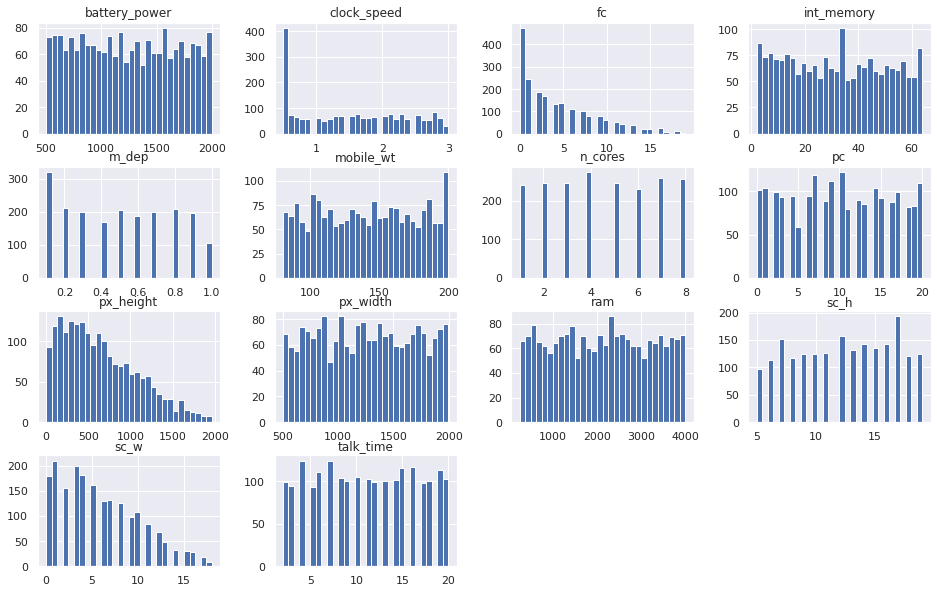

In [38]:
# plotting all the columns except categorical 
hist_plot=df.drop(["blue","dual_sim","four_g","three_g","touch_screen","wifi","price_range"],axis=1)
hist_plot.hist(figsize=[16,10],bins=30)

### Observing dependence of features on target variable (plotting only ones that show any relation with the target)

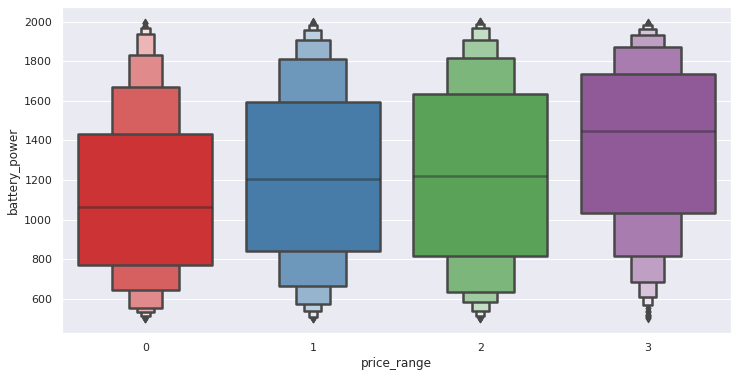

In [39]:
#plotting price range with battery
plt.figure(figsize=(12,6))
sns.boxenplot(data=df,x="price_range",y="battery_power",palette="Set1",linewidth=2.5)
plt.show()

**Replatively expensive phones have higher capacity batteries**

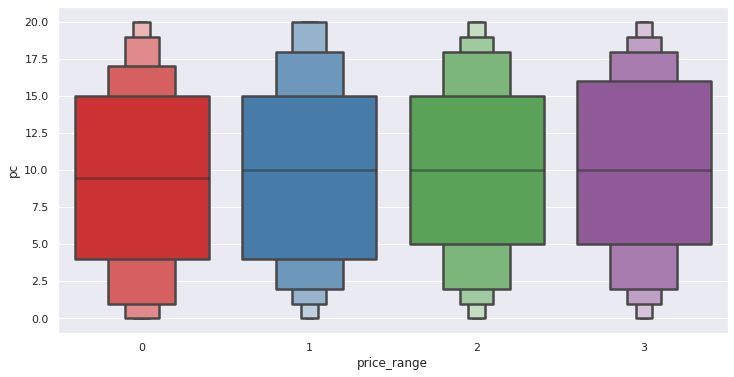

In [40]:
#plotting price range with primary camera pc
plt.figure(figsize=(12,6))
sns.boxenplot(data=df,x="price_range",y="pc",palette="Set1",linewidth=2.5)
plt.show()

**Most expensive (category 3) phones have better cameras.**

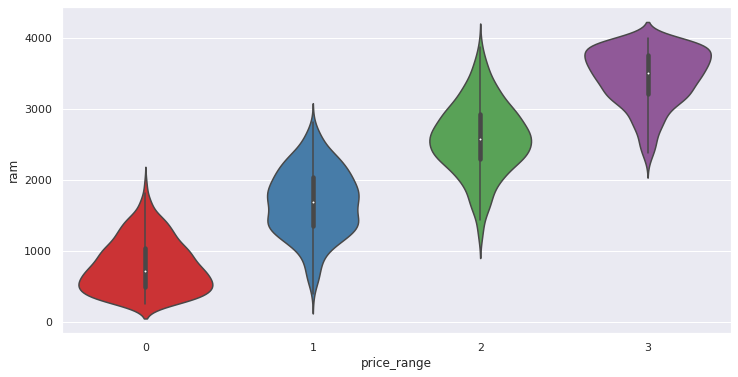

In [41]:
#plotting price range  with ram
plt.figure(figsize=(12,6))
sns.violinplot(data=df,x="price_range",y="ram",palette="Set1")
plt.show()

**Relatively expensive phones have much bigger rams.**

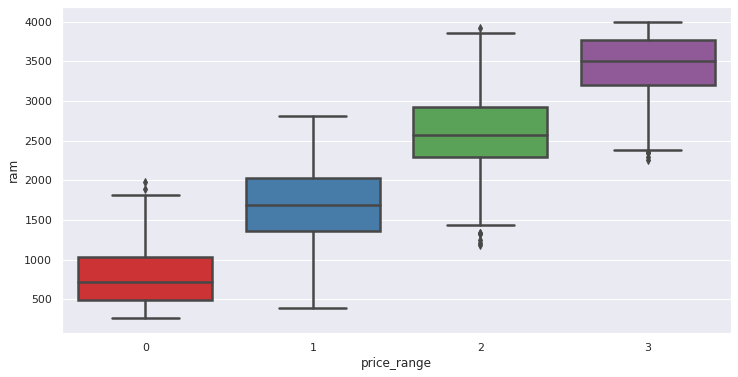

In [42]:
#plotting price range with pixwl resolution height
plt.figure(figsize=(12,6))
sns.boxplot(data=df,x="price_range",y="ram",palette="Set1",linewidth=2.5)
plt.show()

**Expensive phones have better screen quality.**

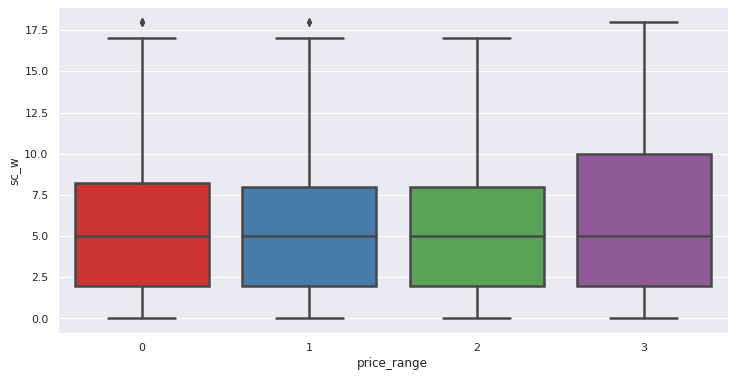

In [43]:
#plotting price range with screen width
plt.figure(figsize=(12,6))
sns.boxplot(data=df,x="price_range",y="sc_w",palette="Set1",linewidth=2.5)
plt.show()

**Most expensive phones have wider screens.**

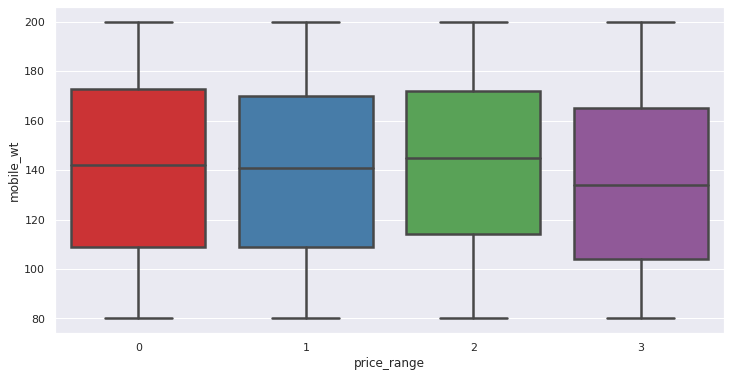

In [44]:
#plotting price range with mobile weight
plt.figure(figsize=(12,6))
sns.boxplot(data=df,x="price_range",y="mobile_wt",palette="Set1",linewidth=2.5)
plt.show()

**Most exxpensive phones are lighter than the competition**

## **Feature Engineering**
- Checking Multicolinearity

In [45]:
# So Making a copy of our dataset
df_1=df.copy()

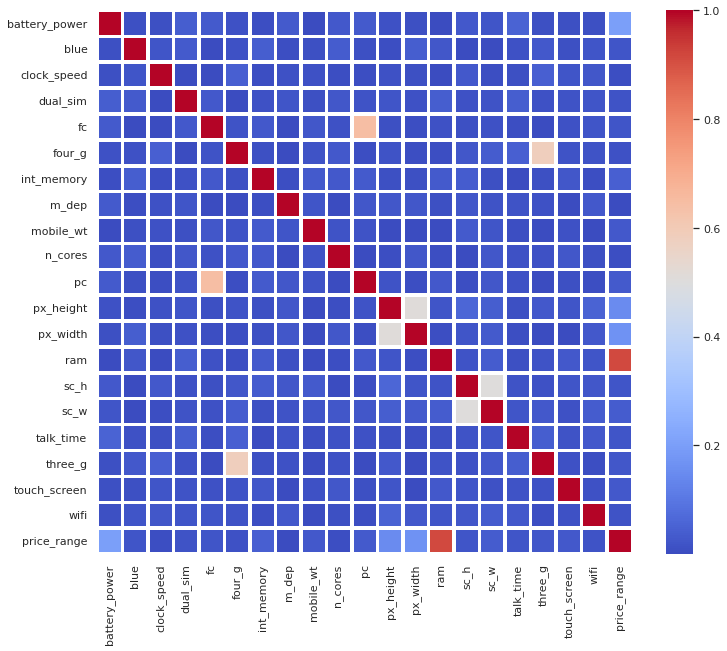

In [46]:
# heatmap checking for multicollinearity
plt.figure(figsize=(12,10))
sns.heatmap(data=abs(df_1.corr()),annot=False, cmap="coolwarm",linewidth=2.5)
plt.show()

In [47]:
# Calculating Vif
from statsmodels.stats.outliers_influence import variance_inflation_factor

def check_vif(dataframe):
  # the independent variables set
  x = dataframe
  # VIF dataframe
  vif_data = pd.DataFrame()
  vif_data["feature"] = x.columns
    
  # calculating VIF for each feature
  vif_data["VIF"] = [variance_inflation_factor(x.values, i)
                            for i in range(len(x.columns))]
  print(vif_data)

In [48]:
check_vif(df_1)

          feature        VIF
0   battery_power   9.852329
1            blue   1.987643
2     clock_speed   4.353409
3        dual_sim   2.038823
4              fc   3.413647
5          four_g   3.194364
6      int_memory   3.979406
7           m_dep   3.952634
8       mobile_wt  14.709826
9         n_cores   4.707757
10             pc   6.251274
11      px_height   4.626185
12       px_width  12.018345
13            ram  39.806450
14           sc_h  11.817054
15           sc_w   3.721933
16      talk_time   4.916936
17        three_g   6.219108
18   touch_screen   2.000108
19           wifi   2.035796
20    price_range  25.874258


In [49]:
# df_1['screen_resolution'] = df_1['px_height'] * df_1['px_width']

In [50]:
# df_1['screen_resolution'] 

In [51]:
# df_1['screen_area'] = df_1['sc_h'] * df_1['sc_w']

In [52]:
# df_1['screen_area']

In [53]:
# df_1.drop(['px_height', 'px_width', 'sc_h', 'sc_w'], axis=1, inplace=True)

In [54]:
check_vif(df_1)

          feature        VIF
0   battery_power   9.852329
1            blue   1.987643
2     clock_speed   4.353409
3        dual_sim   2.038823
4              fc   3.413647
5          four_g   3.194364
6      int_memory   3.979406
7           m_dep   3.952634
8       mobile_wt  14.709826
9         n_cores   4.707757
10             pc   6.251274
11      px_height   4.626185
12       px_width  12.018345
13            ram  39.806450
14           sc_h  11.817054
15           sc_w   3.721933
16      talk_time   4.916936
17        three_g   6.219108
18   touch_screen   2.000108
19           wifi   2.035796
20    price_range  25.874258


**Tried dropping and transforming some features but the VIF score didn't improve. We cannot transform any further as all features are important.**

## **Fixing Some Values**
-As mentioned while exploring data that sc_w and px_h equal to 0 don't make any sense

In [55]:
# replacing sc_w values equal to zero with it's median.
df_1['sc_w'].replace(0, df_1['sc_w'].median(), inplace=True)

In [56]:
# replacing px_height values equal to zero with it's median.
df_1['px_height'].replace(0, df_1['px_height'].median(), inplace=True)

## **Checking For Outlier**

Text(0.5, 1.0, 'Detecting outliers for the dataset')

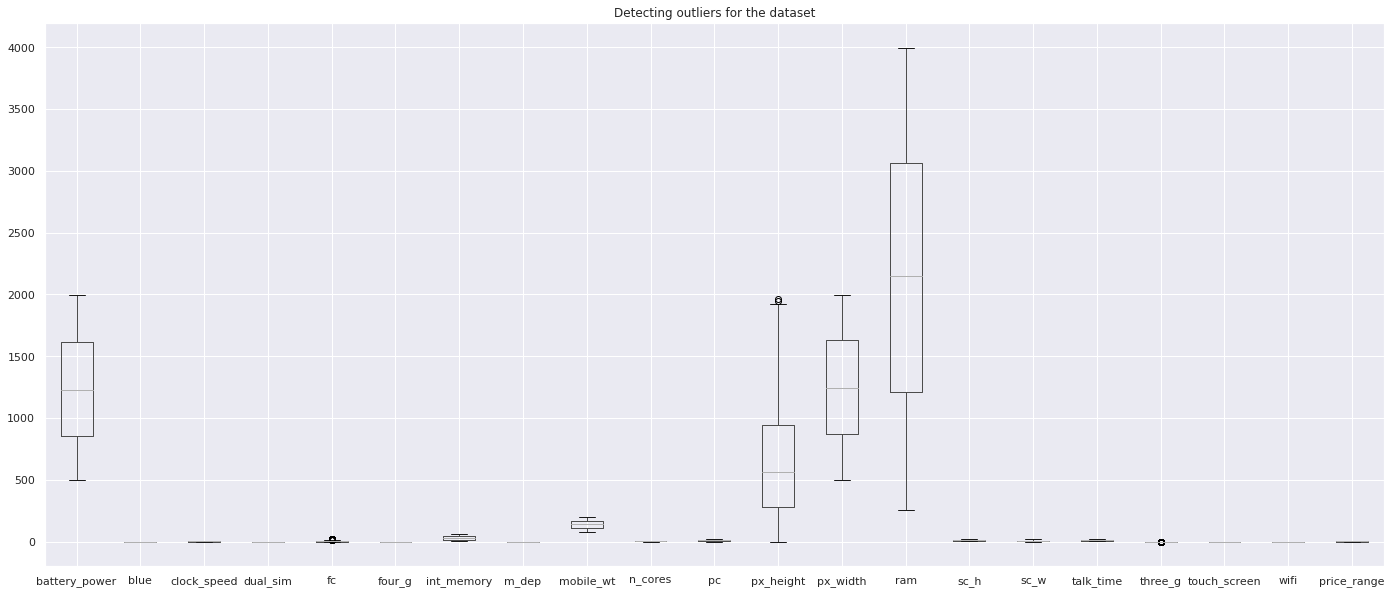

In [57]:
plt.figure(figsize=(24,10))
df_1.boxplot()
plt.title('Detecting outliers for the dataset')

## **Spliting Dependent and independent variable**

In [58]:
#splitting dependent and independent variable
x=df_1.drop(["price_range"],axis=1)
y=df_1["price_range"]

In [59]:
x.shape

(2000, 20)

In [61]:
y

0       1
1       2
2       2
3       2
4       1
       ..
1995    0
1996    2
1997    3
1998    0
1999    3
Name: price_range, Length: 2000, dtype: int64

In [62]:
# Splitting the data in train and test split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=141)

## **Scaling the data**

In [63]:
#scaling the dat
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

## **Predicting price Range Using SVM Calssifier**

In [65]:
from pandas.core.common import random_state
from sklearn.svm import SVC
classifier=SVC(kernel="linear",random_state=142)
classifier.fit(x_train,y_train)

SVC(kernel='linear', random_state=142)

In [66]:
#predicting for training set
y_pred_train=classifier.predict(x_train)


In [67]:
#predicting for test set
y_pred_test=classifier.predict(x_test)

## **Performance Matrics**

In [73]:
from sklearn.metrics import confusion_matrix,classification_report, accuracy_score
#accuracy
print("Accuracy for training set is {}".format(accuracy_score(y_train, y_pred_train)))
print("Accuracy for testing set is {}".format(accuracy_score(y_test, y_pred_test)))

Accuracy for training set is 0.9528571428571428
Accuracy for testing set is 0.9266666666666666


AxesSubplot(0.125,0.125;0.62x0.755)

              precision    recall  f1-score   support

           0       0.96      0.97      0.97       330
           1       0.94      0.95      0.95       365
           2       0.95      0.93      0.94       347
           3       0.96      0.96      0.96       358

    accuracy                           0.95      1400
   macro avg       0.95      0.95      0.95      1400
weighted avg       0.95      0.95      0.95      1400



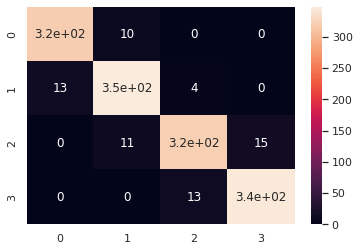

In [74]:
# confusion matrix and classification report for training set
print(sns.heatmap(confusion_matrix(y_train, y_pred_train), annot=True))
print('')
print(classification_report(y_train, y_pred_train))

AxesSubplot(0.125,0.125;0.62x0.755)

              precision    recall  f1-score   support

           0       0.98      0.93      0.95       170
           1       0.86      0.93      0.89       135
           2       0.89      0.92      0.91       153
           3       0.98      0.92      0.95       142

    accuracy                           0.93       600
   macro avg       0.93      0.93      0.93       600
weighted avg       0.93      0.93      0.93       600



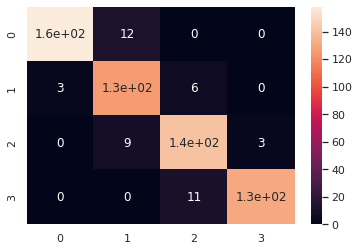

In [75]:
# confusion matrix and classification report for testing set
print(sns.heatmap(confusion_matrix(y_test, y_pred_test), annot=True))
print("")
print(classification_report(y_test, y_pred_test))

## **Hyperparameter Tuning**

In [76]:
from sklearn.model_selection import GridSearchCV

parameters = {'C':[0.1, 1, 10, 100],
              'kernel':['linear', 'poly', 'rbf', 'sigmoid'],
              'degree':[1,2,3,4,5,6],
              'gamma':[0.0001, 0.001, 0.01, 0.1, 1]}

gridsearch_model = GridSearchCV(SVC(), parameters, cv=3)
gridsearch_model.fit(x_train, y_train)

GridSearchCV(cv=3, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100], 'degree': [1, 2, 3, 4, 5, 6],
                         'gamma': [0.0001, 0.001, 0.01, 0.1, 1],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']})

In [77]:
# best parameters after tuning
print('Best parameters for the model are: C = {}, degree = {}, gamma = {}, kernel = {}'.format(gridsearch_model.best_params_['C'], gridsearch_model.best_params_['degree'], 
                                                                                               gridsearch_model.best_params_['gamma'], gridsearch_model.best_params_['kernel']))

Best parameters for the model are: C = 100, degree = 1, gamma = 0.0001, kernel = linear


In [78]:
# accuracy for train and test set
y_grid_train = gridsearch_model.predict(x_train)
y_grid_pred = gridsearch_model.predict(x_test)

print("Accuracy on train set: {}".format(accuracy_score(y_train, y_grid_train)))
print('Accuracy on test set: {}'.format(accuracy_score(y_test, y_grid_pred)))

Accuracy on train set: 0.9864285714285714
Accuracy on test set: 0.955


AxesSubplot(0.125,0.125;0.62x0.755)


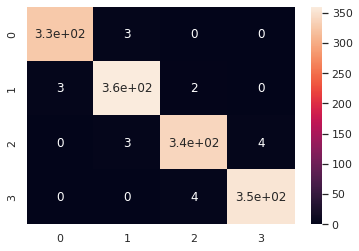

In [79]:
# confusion matrix for train
print(sns.heatmap(confusion_matrix(y_train, y_grid_train), annot=True))

AxesSubplot(0.125,0.125;0.62x0.755)


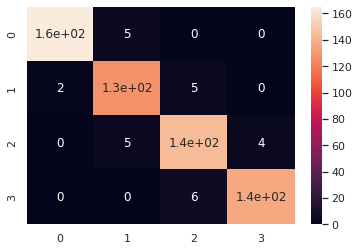

In [80]:
# confusion matrix for test
print(sns.heatmap(confusion_matrix(y_test, y_grid_pred), annot=True))

In [81]:
# classification report
print(classification_report(y_train, y_grid_train))
print(classification_report(y_test, y_grid_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       330
           1       0.98      0.99      0.98       365
           2       0.98      0.98      0.98       347
           3       0.99      0.99      0.99       358

    accuracy                           0.99      1400
   macro avg       0.99      0.99      0.99      1400
weighted avg       0.99      0.99      0.99      1400

              precision    recall  f1-score   support

           0       0.99      0.97      0.98       170
           1       0.93      0.95      0.94       135
           2       0.93      0.94      0.94       153
           3       0.97      0.96      0.96       142

    accuracy                           0.95       600
   macro avg       0.95      0.95      0.95       600
weighted avg       0.96      0.95      0.96       600



## **Predictiong Price Using Naive bayes classifier**

In [82]:
from sklearn.naive_bayes import GaussianNB

classifier_2 = GaussianNB()
classifier_2.fit(x_train, y_train)

GaussianNB()

In [83]:
# prediction fot training and test set
y_train_pred_gnb = classifier_2.predict(x_train)
y_pred_gnb = classifier_2.predict(x_test)

In [84]:
#accuracy
print("Accuracy for training set is {}".format(accuracy_score(y_train, y_train_pred_gnb)))
print("Accuracy for testing set is {}".format(accuracy_score(y_test, y_pred_gnb)))

Accuracy for training set is 0.8264285714285714
Accuracy for testing set is 0.8116666666666666


AxesSubplot(0.125,0.125;0.62x0.755)


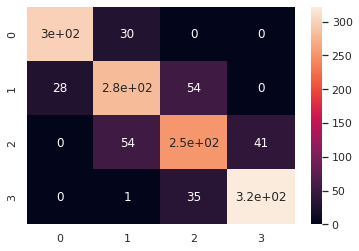

In [85]:
# confusion matrix for train
print(sns.heatmap(confusion_matrix(y_train, y_train_pred_gnb), annot=True))

AxesSubplot(0.125,0.125;0.62x0.755)


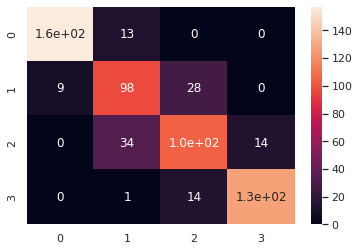

In [86]:
# confusion matrix for test
print(sns.heatmap(confusion_matrix(y_test, y_pred_gnb), annot=True))

In [87]:
# classification report
print(classification_report(y_train, y_train_pred_gnb))
print(classification_report(y_test, y_pred_gnb))

              precision    recall  f1-score   support

           0       0.91      0.91      0.91       330
           1       0.77      0.78      0.77       365
           2       0.74      0.73      0.73       347
           3       0.89      0.90      0.89       358

    accuracy                           0.83      1400
   macro avg       0.83      0.83      0.83      1400
weighted avg       0.83      0.83      0.83      1400

              precision    recall  f1-score   support

           0       0.95      0.92      0.93       170
           1       0.67      0.73      0.70       135
           2       0.71      0.69      0.70       153
           3       0.90      0.89      0.90       142

    accuracy                           0.81       600
   macro avg       0.81      0.81      0.81       600
weighted avg       0.81      0.81      0.81       600

